In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
stud_df = pd.read_csv("StudentsPerformance.csv")

In [32]:
stud_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [33]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [34]:
stud_df = stud_df.rename(
    columns={
        "gender": "gender",
        "race/ethnicity": "social_group",
        "parental level of education": "parent_education",
        "lunch": "lunch",
        "test preparation course": "test_prep_course",
        "math score": "math_score",
        "reading score": "read_score",
        "writing score": "write_score",
    }
)

In [35]:
stud_df.columns

Index(['gender', 'social_group', 'parent_education', 'lunch',
       'test_prep_course', 'math_score', 'read_score', 'write_score'],
      dtype='object')

In [36]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   social_group      1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_prep_course  1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   read_score        1000 non-null   int64 
 7   write_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Adding Grade Column

In [37]:
def AverageToGrade(AverageScore):
    if AverageScore >= 80:
        return "A"
    if AverageScore >= 70:
        return "B"
    if AverageScore >= 60:
        return "C"
    if AverageScore >= 50:
        return "D"
    if AverageScore >= 40:
        return "E"
    else:
        return "F"

## Setting average

In [38]:
stud_df["average"] = stud_df[["math_score", "read_score", "write_score"]].mean(axis=1)
stud_df.head()

,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [39]:
stud_df["grade"] = stud_df.apply(lambda x: AverageToGrade(x["average"]), axis=1)
stud_df.head(20)

,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,E
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,E


In [40]:
stud_df.to_excel("newExcel2.xlsx")
df=pd.read_excel("newExcel2.xlsx")
df.head()

,Unnamed: 0,gender,social_group,parent_education,lunch,test_prep_course,math_score,read_score,write_score,average,grade
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,4,male,group C,some college,standard,none,76,78,75,76.333333,B


C:\Users\interface\AppData\Local\Temp\ipykernel_15596\2493759891.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


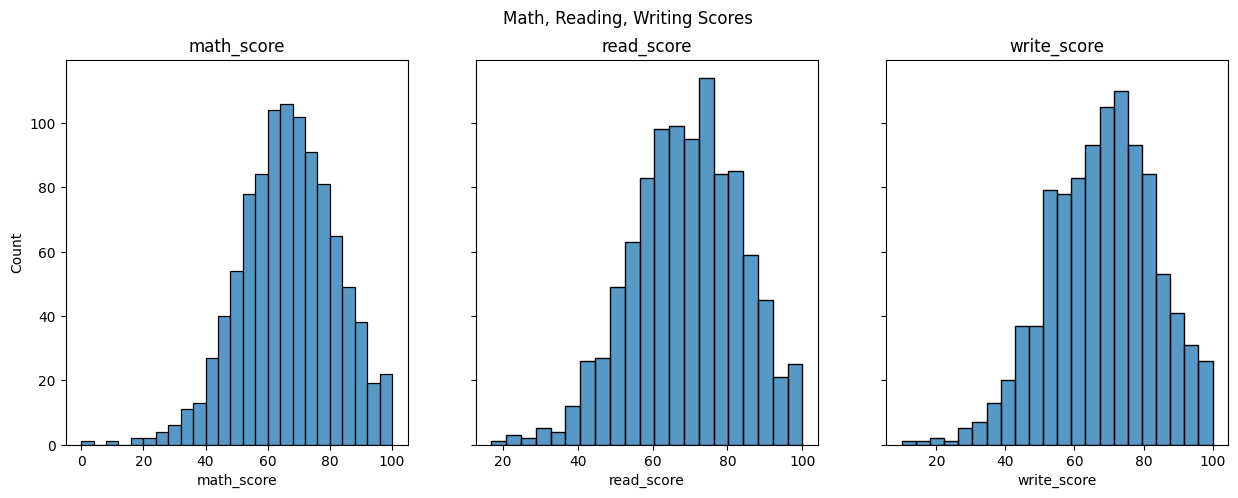

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Math, Reading, Writing Scores')

# Math Scores
sns.histplot(stud_df['math_score'], ax=axes[0])
axes[0].set_title('math_score')

# Reading Scores
sns.histplot(stud_df['read_score'], ax=axes[1])
axes[1].set_title('read_score')

# Writing Scores
sns.histplot(stud_df['write_score'], ax=axes[2])
axes[2].set_title('write_score')

fig.show()

In [42]:
fig.suptitle('Scatterplots of Math vs. Reading vs. Writing Scores')

# Math Scores
sns.scatterplot(x=stud_df['math_score'], y=stud_df['read_score'], ax=axes[0])
axes[0].set_title('Reading Scores Vs Math Scores')

# Reading Scores
sns.scatterplot(x=stud_df['read_score'], y=stud_df['write_score'], ax=axes[1])
axes[1].set_title('Writing Scores Vs Reading Scores')

# Writing Scores
sns.scatterplot(x=stud_df['math_score'], y=stud_df['write_score'], ax=axes[2])
axes[2].set_title('Math Scores Vs Writing Scores')

fig.show()

C:\Users\interface\AppData\Local\Temp\ipykernel_15596\2750838069.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='grade', ylabel='count'>

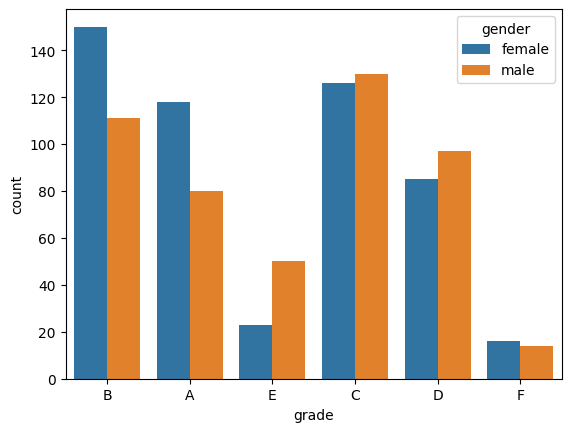

In [43]:
sns.countplot(data=stud_df, x=stud_df["grade"], hue=stud_df["gender"])

In [44]:
gender_mean = (
    stud_df.groupby("gender")[["math_score", "read_score", "write_score", "average"]]
    .mean()
    .round(2)
)
gender_mean

,math_score,read_score,write_score,average
gender,,,,
female,63.63,72.61,72.47,69.57
male,68.73,65.47,63.31,65.84


Average: 66


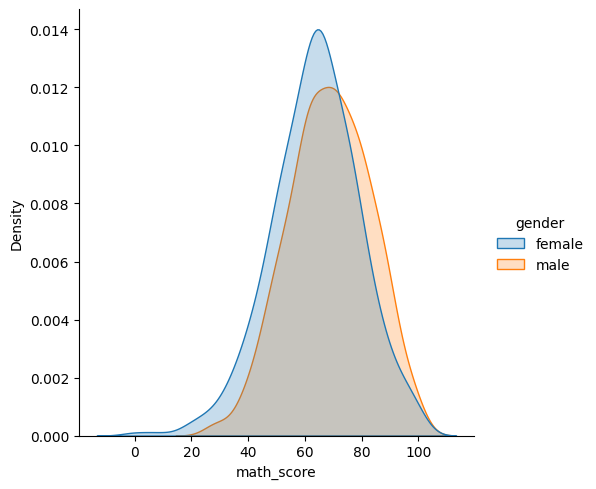

In [46]:
sns.displot(stud_df, x="math_score", hue="gender", kind="kde", fill="true")
print("Average: %d" % stud_df["math_score"].median())